Accuracy with different distance metrics for k=5:
Euclidean: 0.96
Manhattan: 0.96
Minkowski: 0.96


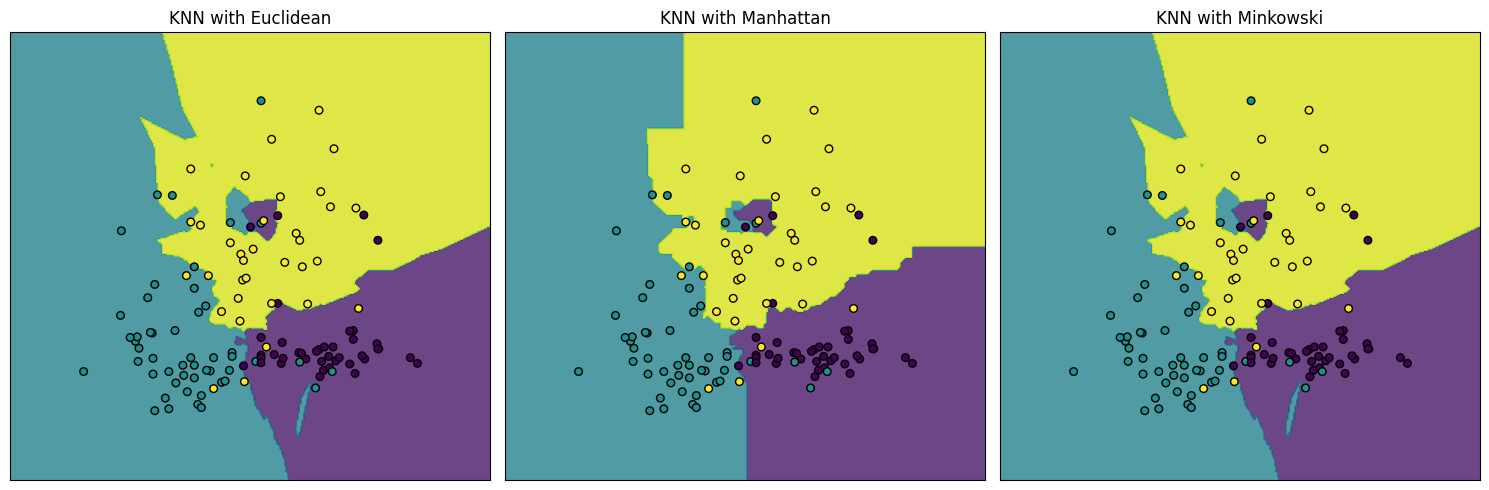

Accuracy for different k values (using Euclidean distance):
k=1: 0.96
k=3: 0.96
k=5: 0.96
k=7: 0.98
k=9: 0.98
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1}
Best Cross-Validation Accuracy: 0.98
Test Set Accuracy with Best Model: 0.96


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Wine Dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN implementation with different distance metrics
def knn_with_metrics(k, metric):
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

metrics = ['euclidean', 'manhattan', 'minkowski']
k = 5  # Set the number of neighbors
accuracies = {}

# Evaluate the KNN model using different distance metrics
for metric in metrics:
    accuracies[metric] = knn_with_metrics(k, metric)

# Display the accuracies
print(f"Accuracy with different distance metrics for k={k}:")
for metric, acc in accuracies.items():
    print(f"{metric.capitalize()}: {acc:.2f}")


def plot_decision_boundary(X, y, model, ax, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=30)
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

# Use only the first two features for visualization
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Plot decision boundaries for different metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, metric in enumerate(metrics):
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(X_train_2d, y_train)
    plot_decision_boundary(X_train_2d, y_train, knn, axes[i], f"KNN with {metric.capitalize()}")

plt.tight_layout()
plt.show()


# Test the effect of different k values
k_values = [1, 3, 5, 7, 9]
accuracies_k = {}

for k in k_values:
    accuracies_k[k] = knn_with_metrics(k, 'euclidean')  # Using Euclidean distance

print(f"Accuracy for different k values (using Euclidean distance):")
for k, acc in accuracies_k.items():
    print(f"k={k}: {acc:.2f}")




from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(f"Test Set Accuracy with Best Model: {test_accuracy:.2f}")


